# CoWrite Studio – Task 2 Prototype Notebook (Evidence)

This notebook runs the **CoWrite Studio** Python prototype and produces the same evidence used in Task 2:
- Iteration outputs (raw + scored JSON)
- Screenshots (iteration1.png, iteration2.png, summary.png)
- Automated tests (PyTest)

> If you already have an `outputs/` folder, you can skip re-running the model and just load the files.


## 0) Project folder

Run this notebook **from the `cowrite-studio` project root** (the folder that contains:
`cowrite_studio.py`, `requirements.txt`, `src/`, `tests/`).


In [7]:
from pathlib import Path
import os, sys

ROOT = Path.cwd()
print("Current folder:", ROOT)

required = ["cowrite_studio.py", "requirements.txt", "src", "tests"]
missing = [p for p in required if not (ROOT / p).exists()]
if missing:
    raise FileNotFoundError(
        "This notebook must be run from the cowrite-studio project root.\n"
        f"Missing: {missing}\n"
        "Tip: open the notebook inside the cowrite-studio folder and re-run."
    )
print("✅ Project root detected.")


Current folder: /Users/muhammadadnan/Downloads/cowrite-studio
✅ Project root detected.


## 1) Install dependencies (first run only)

This prototype uses open-source libraries listed in `requirements.txt`.


In [8]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", "requirements.txt"])
print("✅ Dependencies installed.")


✅ Dependencies installed.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


## 2) Smoke test: import core modules

This confirms the code is structured as an importable Python package.


In [9]:
from src.config import Brief
from src.generator import build_prompt, parse_numbered_list
from src.scoring import score_copy

print("✅ Imports succeeded.")


✅ Imports succeeded.


## 3) Run the prototype (generates evidence)

This runs `cowrite_studio.py` and creates/overwrites the `outputs/` folder.

Note: the first generation may download the chosen open-source model (can take time).


In [10]:
import subprocess, sys

# Run the script
result = subprocess.run([sys.executable, "cowrite_studio.py"], capture_output=True, text=True)
print(result.stdout)
if result.returncode != 0:
    print(result.stderr)
    raise RuntimeError("cowrite_studio.py failed")
print("✅ Prototype run complete.")


Done. Open the 'outputs' folder to collect your evidence.

✅ Prototype run complete.


## 4) Load evidence files and print the top scored outputs


In [11]:
import json
from pathlib import Path

OUT = Path("outputs")
run1 = json.loads((OUT / "run_1_scored.json").read_text(encoding="utf-8"))
run2 = json.loads((OUT / "run_2_scored.json").read_text(encoding="utf-8"))

def show_top(scored, label, n=3):
    print(f"\n{label} – Top {n}")
    for i, item in enumerate(scored[:n], start=1):
        print(f"{i}) Score {item['score']}: {item['copy']}")
        print(f"   Notes: {item['notes']}\n")

show_top(run1.get("scored", []), "Iteration 1")
show_top(run2.get("scored", []), "Iteration 2")



Iteration 1 – Top 3
1) Score 65: #DiscoverYourDreamsWithUs! Discover local solutions for your projects in Dubai. Our expert team will help you get the best deals & services. #LocalServicesForDubai #ReadyToBookNow
   Notes: {'length': 'OK (23 words).', 'must_include': 'Missing one or more must-include phrases.', 'banned_words': 'OK.'}

2) Score 45: Include a visual representation of the product/service on the first sentence
   Notes: {'length': 'Too short (11 words).', 'must_include': 'Missing one or more must-include phrases.', 'banned_words': 'OK.'}

3) Score 45: Remember, your captions should make people want to click through to see them!
   Notes: {'length': 'Too short (13 words).', 'must_include': 'Missing one or more must-include phrases.', 'banned_words': 'OK.'}


Iteration 2 – Top 3
1) Score 100: Get your local service ready! now to get expert tips & guidance tailored for your needs. DM to book
   Notes: {'length': 'OK (19 words).', 'must_include': 'OK.', 'banned_words': 'OK.'}

## 5) View screenshots inside the notebook


In [12]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
print("Installed matplotlib into:", sys.executable)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.1/270.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 7.2 MB/s eta 0:00:00
Installed matplotlib into: /Users/muhammadadnan/Downloads/cowrite-studio/.venv/bin/python



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


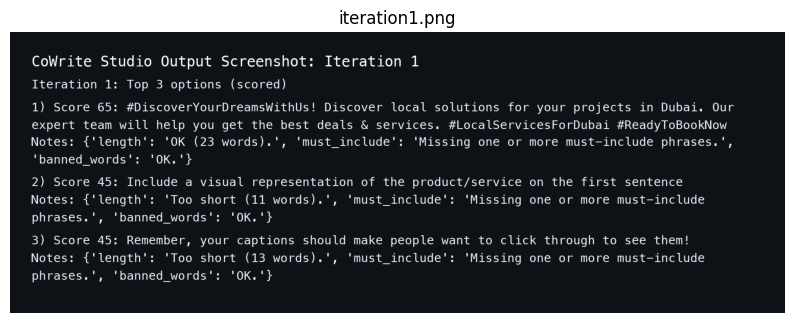

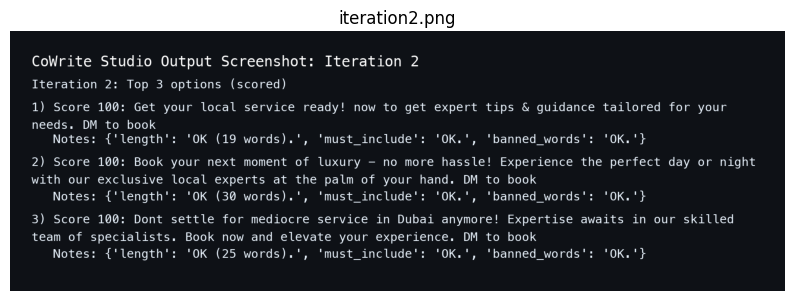

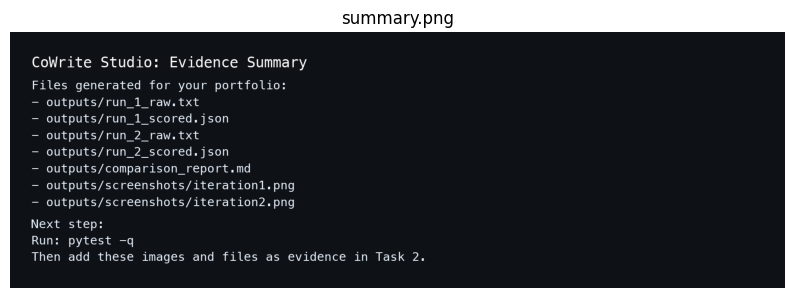

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

shots = [
    Path("outputs/screenshots/iteration1.png"),
    Path("outputs/screenshots/iteration2.png"),
    Path("outputs/screenshots/summary.png"),
]

for p in shots:
    img = Image.open(p)
    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    plt.axis("off")
    plt.title(p.name)
    plt.show()


## 6) Run automated tests (PyTest)

This validates the parsing and scoring logic.


In [14]:
import subprocess, sys
result = subprocess.run([sys.executable, "-m", "pytest", "-q"], capture_output=True, text=True)
print(result.stdout)
if result.returncode != 0:
    print(result.stderr)
    raise RuntimeError("PyTest failed")
print("✅ All tests passed.")


....                                                                     [100%]
4 passed in 0.01s

✅ All tests passed.


## 7) (Optional) Quick preview of the comparison report


In [15]:
from pathlib import Path
report = Path("outputs/comparison_report.md").read_text(encoding="utf-8")
print("\n".join(report.splitlines()[:40]))


# CoWrite Studio: Iteration Evidence Report

## Brief (human-defined constraints)
{
  "product": "Instagram content and caption package (client project)",
  "audience": "Dubai-based customers searching for local services",
  "tone": "Professional, premium, helpful (not pushy)",
  "goal": "Generate Instagram-ready captions that drive inquiries and bookings",
  "must_include": [
    "DM to book"
  ],
  "banned_words": [
    "guaranteed",
    "cure",
    "miracle",
    "100%",
    "click here",
    "[Instagram]",
    "please let me know",
    "feel free to ask",
    "great job",
    "keep up"
  ],
  "min_words": 18,
  "max_words": 45,
  "num_options": 6
}

## Iteration 1 (AI generation then evaluation)
Best option:
- Score: 65
- Copy: #DiscoverYourDreamsWithUs! Discover local solutions for your projects in Dubai. Our expert team will help you get the best deals & services. #LocalServicesForDubai #ReadyToBookNow
- Notes: {'length': 'OK (23 words).', 'must_include': 'Missing one or more mus